In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path = 'healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Terdapat beberapa missing value pada kolom bmi.

In [4]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


### Menangani missing value

In [6]:
# drop baris dengan missing value
df = df[~df['bmi'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


### Menangani outliers

<Axes: xlabel='age'>

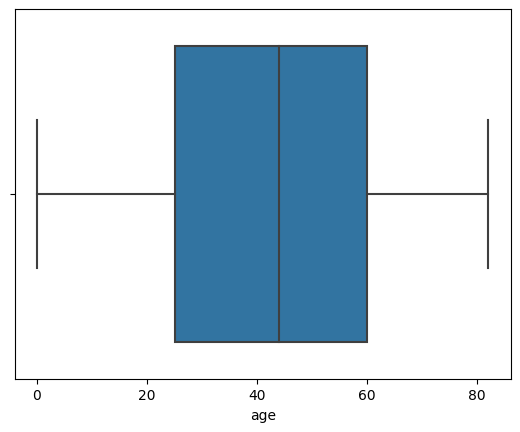

In [7]:
sns.boxplot(x=df['age'])

<Axes: xlabel='avg_glucose_level'>

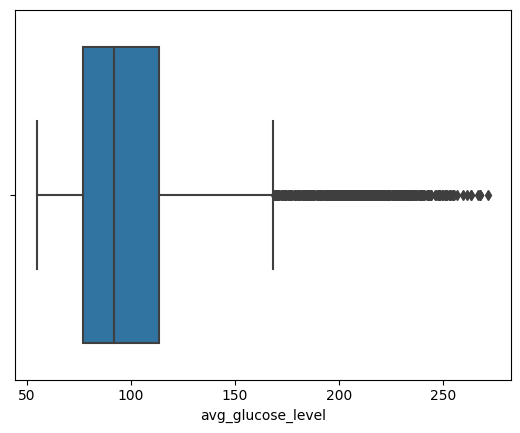

In [8]:
sns.boxplot(x=df['avg_glucose_level'])

Terdapat beberapa outlier pada kolom avg_glucose_level.

<Axes: xlabel='bmi'>

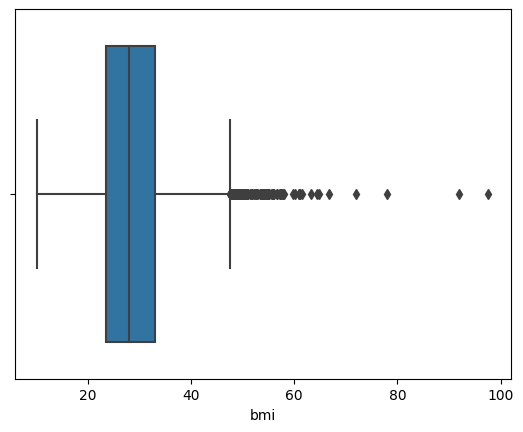

In [9]:
sns.boxplot(x=df['bmi'])

Terdapat beberapa outlier pada kolom bmi.

In [10]:
# drop outlier pada kolom avg_glucose_level
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR=Q3-Q1
df = df[~((df['avg_glucose_level']<(Q1-1.5*IQR))|(df['avg_glucose_level']>(Q3+1.5*IQR)))]

In [11]:
# drop outlier pada kolom bmi
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR=Q3-Q1
df = df[~((df['bmi']<(Q1-1.5*IQR))|(df['bmi']>(Q3+1.5*IQR)))]

In [12]:
df.groupby(df['gender']).count()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524
Male,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727
Other,1,1,1,1,1,1,1,1,1,1,1


Terdapat 1 data dengan gender berbeda.

In [13]:
# drop row dengan gender 'Other'
df = df[df['gender']!='Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4251 entries, 2 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4251 non-null   int64  
 1   gender             4251 non-null   object 
 2   age                4251 non-null   float64
 3   hypertension       4251 non-null   int64  
 4   heart_disease      4251 non-null   int64  
 5   ever_married       4251 non-null   object 
 6   work_type          4251 non-null   object 
 7   Residence_type     4251 non-null   object 
 8   avg_glucose_level  4251 non-null   float64
 9   bmi                4251 non-null   float64
 10  smoking_status     4251 non-null   object 
 11  stroke             4251 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 431.7+ KB


Setelah membersihkan data, terdapat 4251 data untuk dianalisis lebih lanjut.

# Univariate Analysis

In [14]:
# drop kolom id
df = df.drop('id',axis=1)

In [15]:
numerical_col = ['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']
categorical_col = ['gender','ever_married','work_type','Residence_type','smoking_status']

### Categorical Features

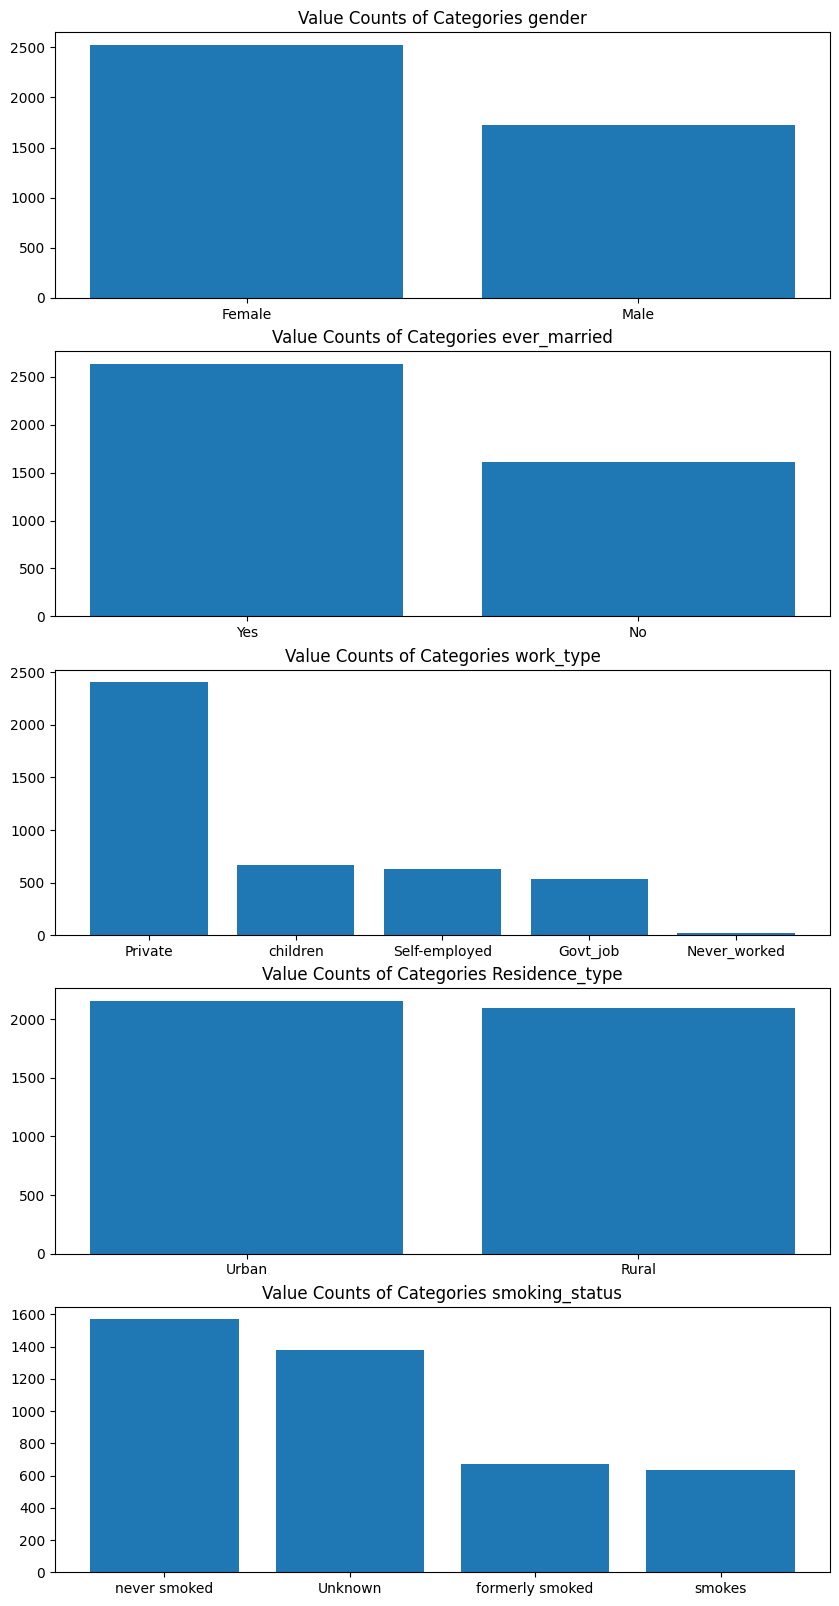

In [16]:
fig,ax = plt.subplots(len(categorical_col),1,figsize=(10,20))

for i in range(len(categorical_col)):
    count = df[categorical_col[i]].value_counts()
    ax[i].bar(count.index,count.values)
    ax[i].set_title(f'Value Counts of Categories {categorical_col[i]}')

### Numerical Features

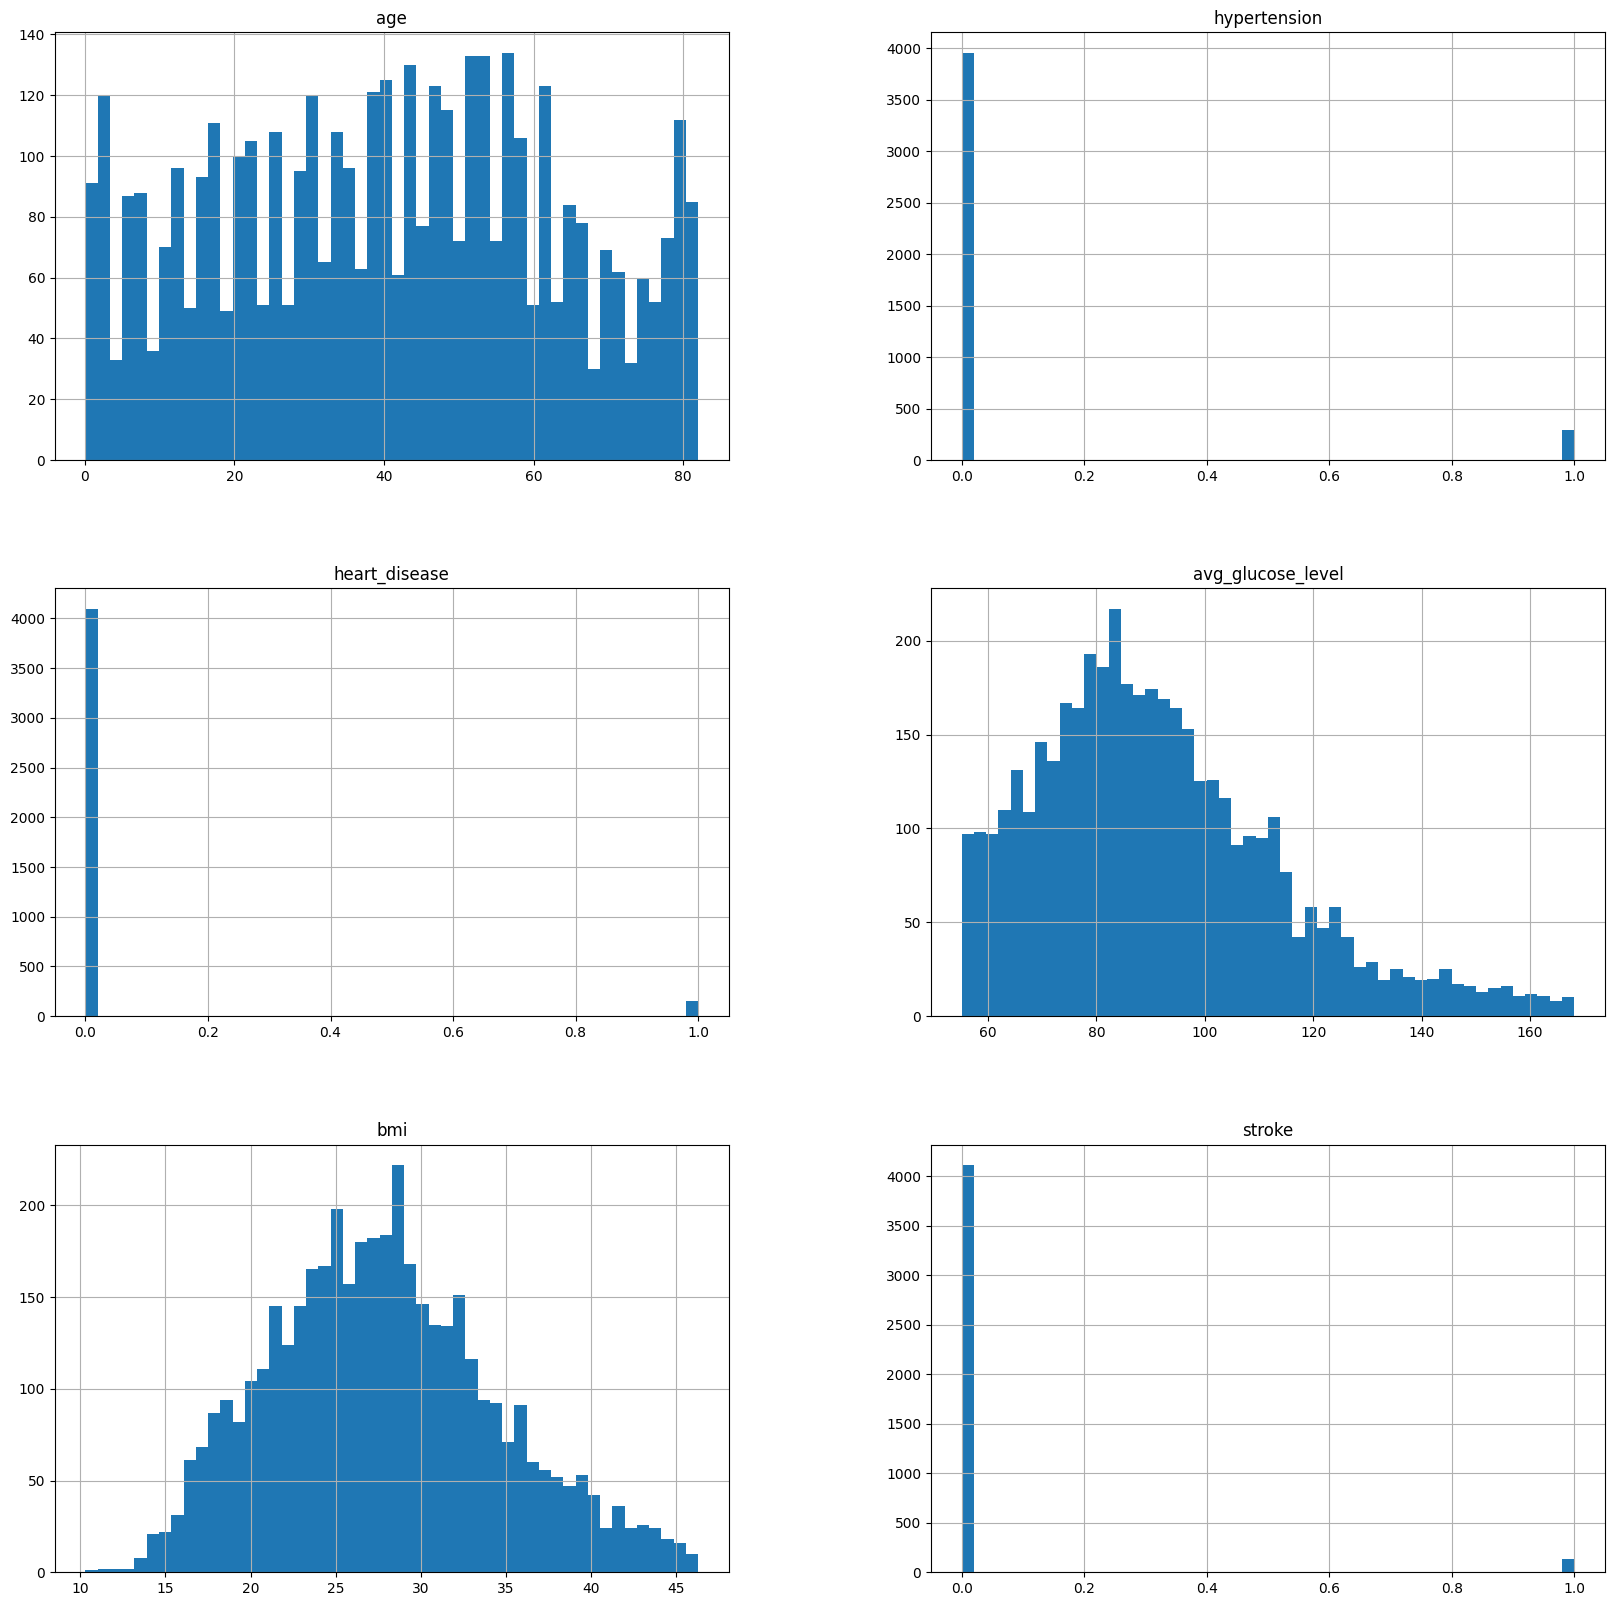

In [18]:
df.hist(bins=50,figsize=(20,20))
plt.show()

Dapat dilihat berdasarkan grafik, grafik avg_glucose_level memiliki distribusi yang right-skewed dan grafik bmi memiliki distribusi yang cukup normal.

### Handling Skewed Dataset

Karena distribusi avg_glucose_level right-skewed maka kita dapat menerapkan metode log transformation untuk melakukan standarisasi.

In [47]:
df['avg_glucose_level'].skew()

0.8356851334118307

In [48]:
df['avg_glucose_level'] = df['avg_glucose_level'].apply(np.log1p)
df['avg_glucose_level'].skew()

0.2432693252706336

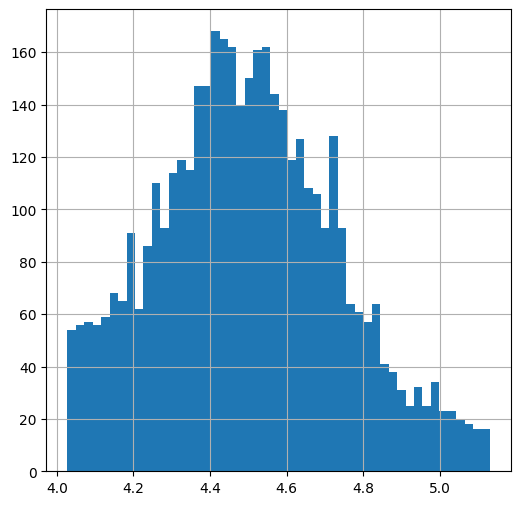

In [49]:
df['avg_glucose_level'].hist(bins=50,figsize=(6,6))
plt.show()

# Multivariate Analysis

### Categorical Features

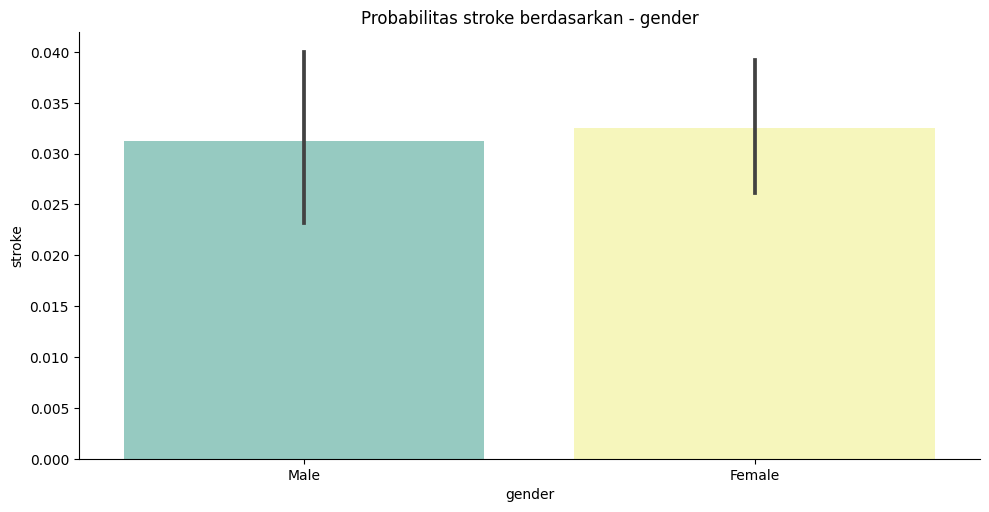

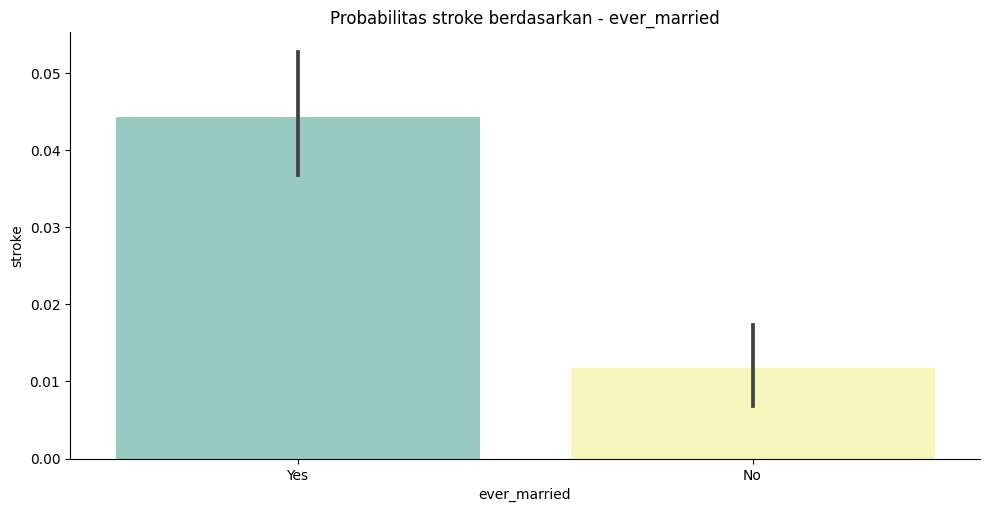

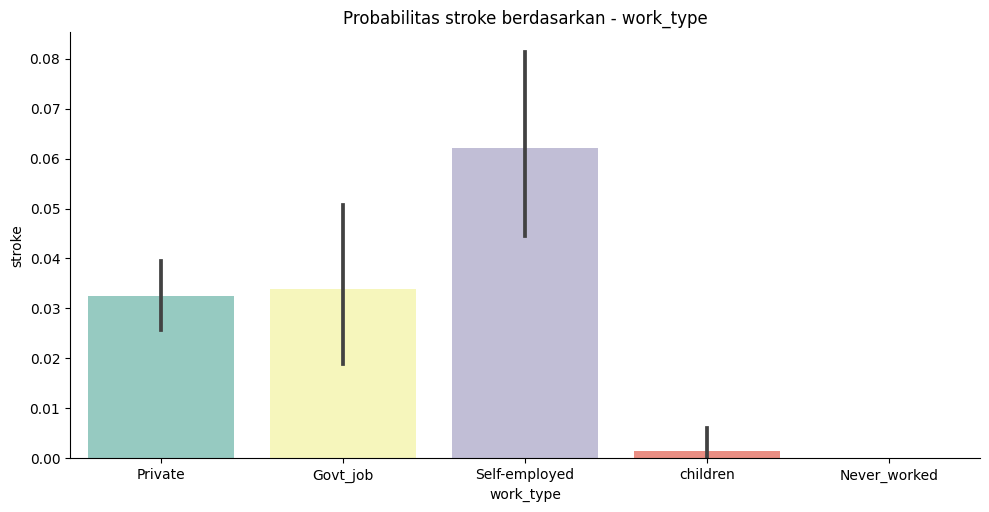

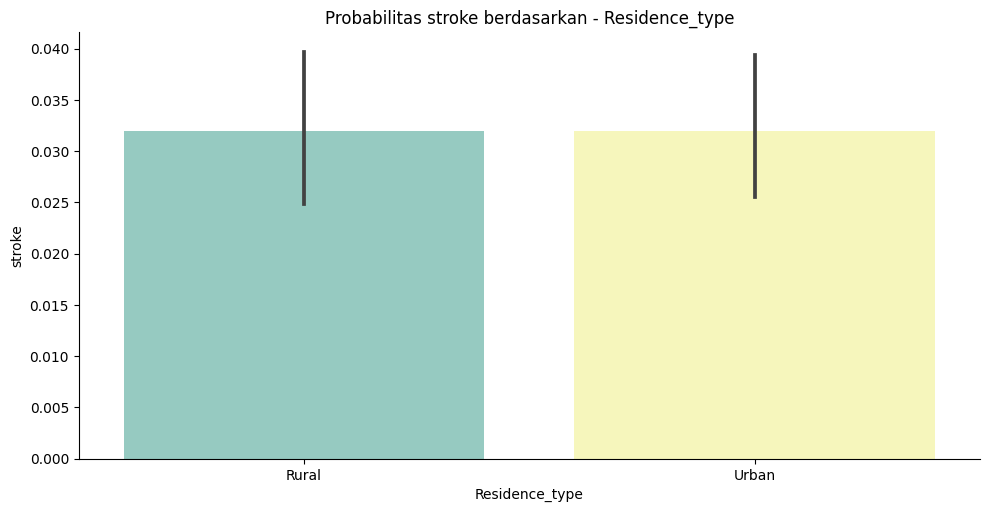

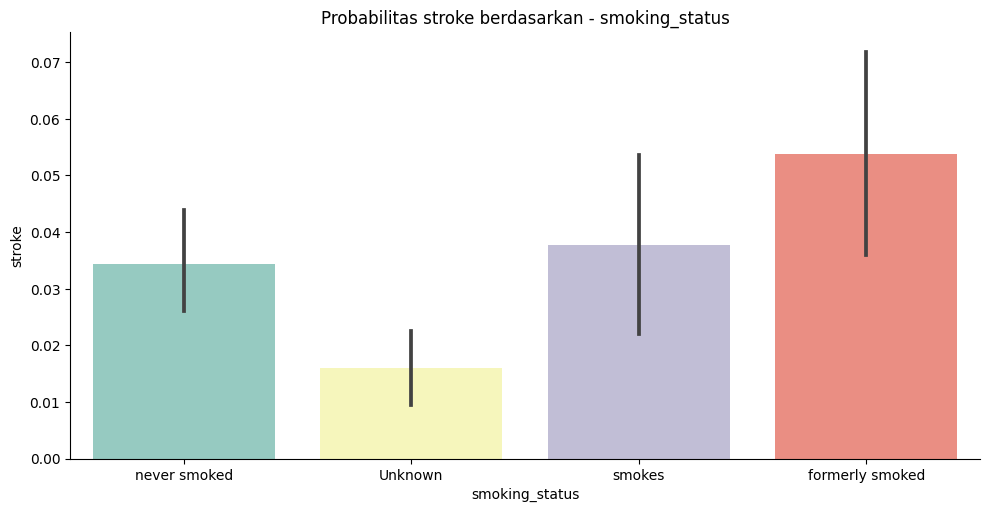

In [50]:
for col in categorical_col:
    sns.catplot(x=col, y="stroke", kind="bar", height = 5, aspect = 2,  data=df, palette="Set3")
    plt.title("Probabilitas stroke berdasarkan - {}".format(col))

Berdasarkan grafik categorical plot yang menyatakan probabilitas stroke berdasarkan masing - masing categorical features, dapat disimpulkan :
1. Berdasarkan gender, kedua gender hampir memiliki probabilitas yang sama dalam klasifikasi stroke.
2. Berdasarkan ever_married, probabilitas stroke yang sudah menikah lebih besar dibanding yang belum menikah.
3. Berdasarkan work_type, probabilitas stroke berdasarkan work_type cukup bervariasi dengan probabilitas tertinggi adalah Self-employed.
4. Berdasarkan Residence_type, kedua tipe hampir memiliki probabilitas yang sama.
5. Berdasarkan smoking_status, probabilitas stroke berdasarkan smoking_status cukup bervariasi dengan probabilitas tertinggi adalah formerly smoked.

Maka, fitur categori memiliki pengaruh rendah terhadap stroke.

### Numerical Features

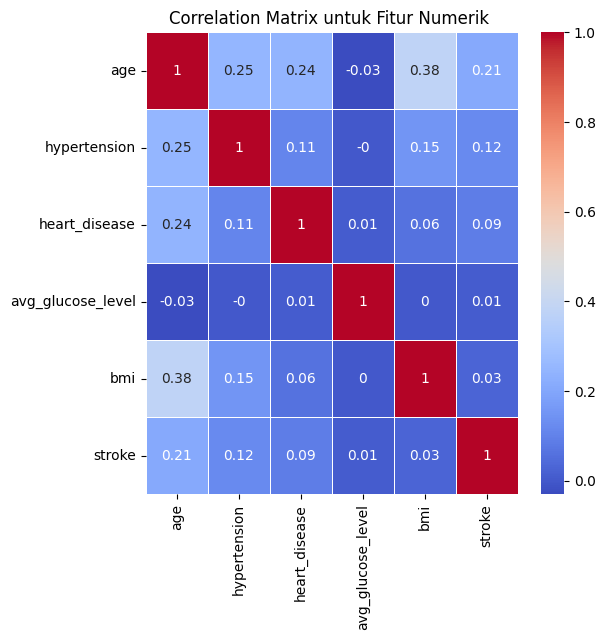

In [20]:
plt.figure(figsize=(6, 6))
numerical_df = df[numerical_col]
correlation_matrix = numerical_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=12)
plt.show()

# Data Preparation

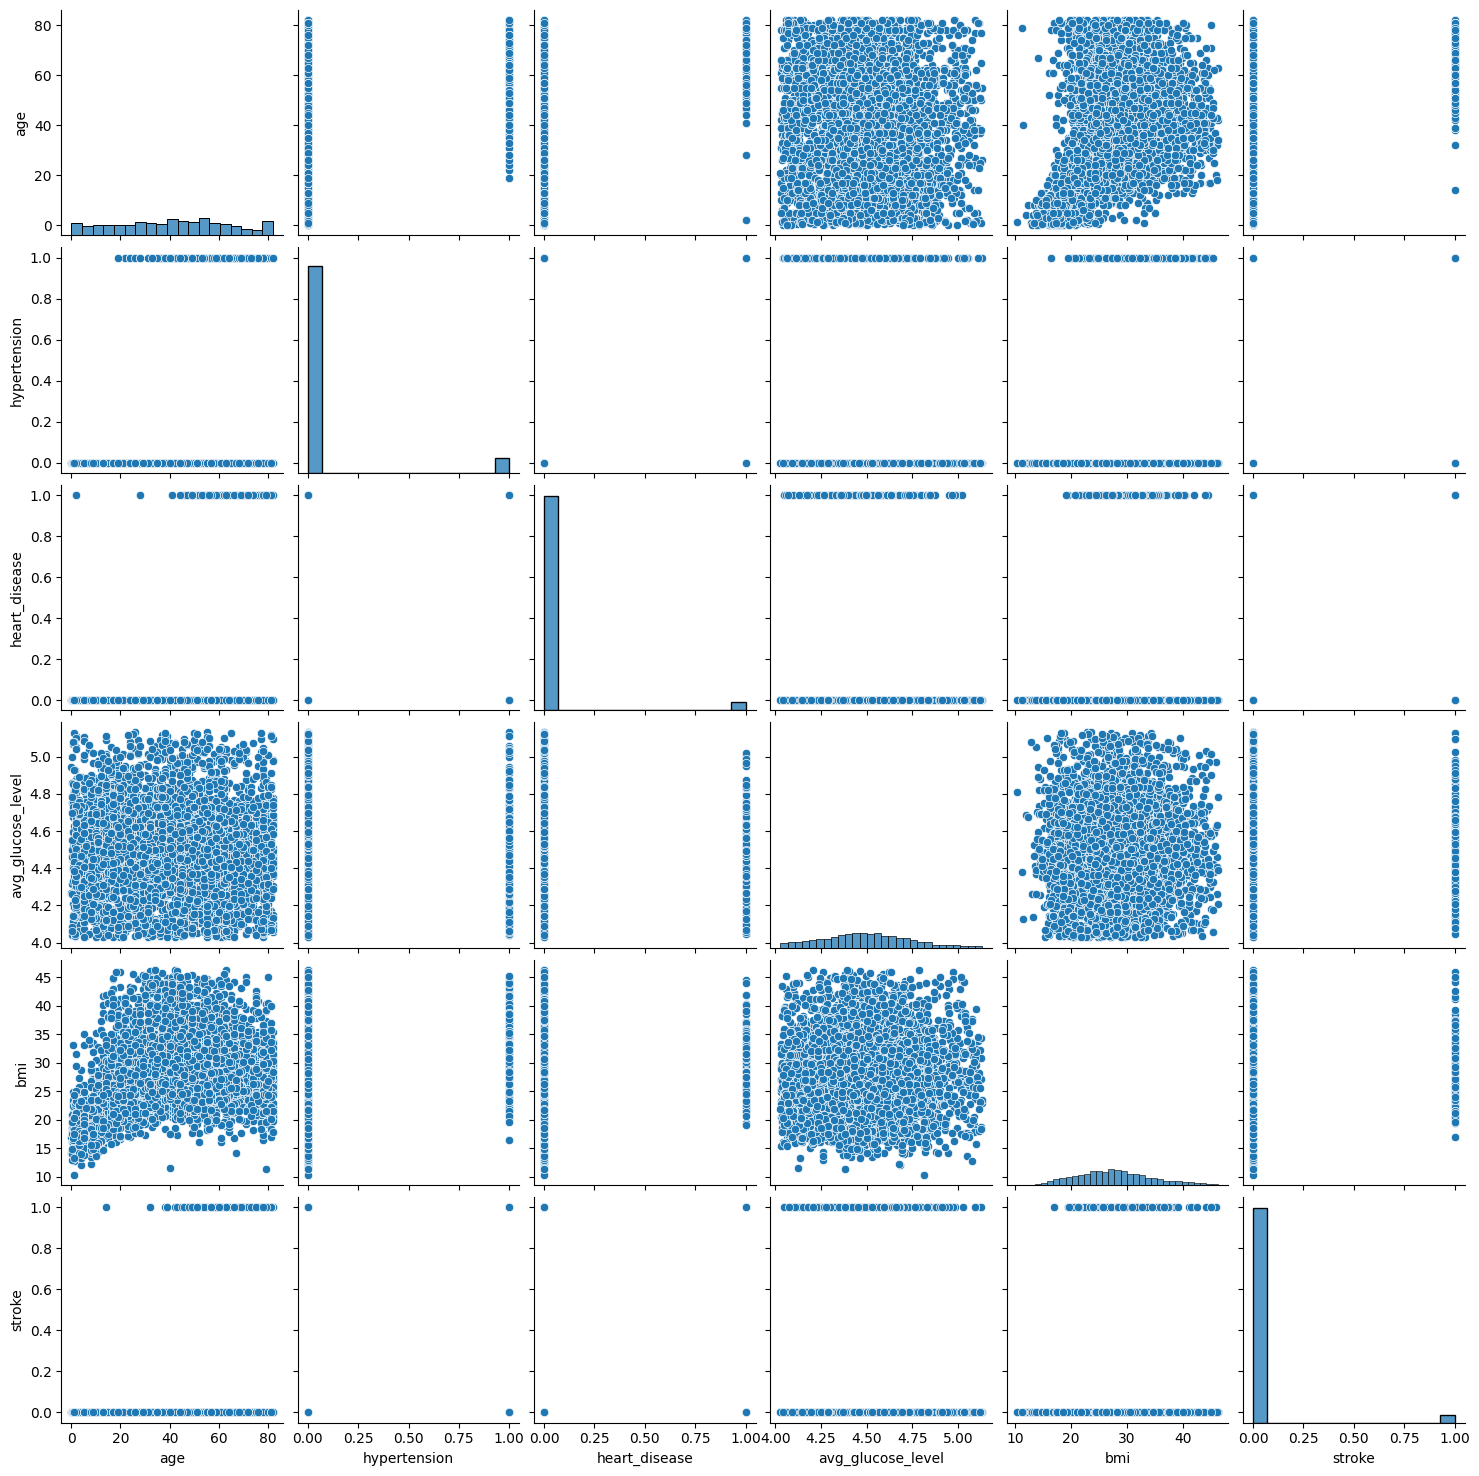

In [52]:
sns.pairplot(df)

Berdasarkan pairplot, dapat dicoba untuk melakukan reduksi dimensi khususnya pada fitur age dan bmi.

In [53]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2, random_state=123)
pca.fit(df[['age','bmi']])
princ_comp = pca.transform(df[['age','bmi']])

In [54]:
pca.explained_variance_ratio_.round(3)

array([0.932, 0.068])

Dengan mereduksi dimensi fitur age dan bmi ke PC pertama, hanya diperoleh 93% informasi dari kedua fitur tersebut. Dalam kasus ini, karena fitur age memiliki korelasi yang cukup tinggi terhadap fitur stroke dan data yang diproses belum terlalu banyak, maka untuk memperoleh hasil yang lebih akurat tidak dilakukan reduksi dimensi.

### Encoding

In [55]:
for col in categorical_col:
    df = pd.concat([df,pd.get_dummies(df[f'{col}'], prefix=f'{col}')],axis=1)

df.drop([i for i in categorical_col],axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4251 entries, 2 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4251 non-null   float64
 1   hypertension                    4251 non-null   int64  
 2   heart_disease                   4251 non-null   int64  
 3   avg_glucose_level               4251 non-null   float64
 4   bmi                             4251 non-null   float64
 5   stroke                          4251 non-null   int64  
 6   gender_Female                   4251 non-null   uint8  
 7   gender_Male                     4251 non-null   uint8  
 8   ever_married_No                 4251 non-null   uint8  
 9   ever_married_Yes                4251 non-null   uint8  
 10  work_type_Govt_job              4251 non-null   uint8  
 11  work_type_Never_worked          4251 non-null   uint8  
 12  work_type_Private               42

### Split Dataset

In [57]:
# normalize the dataset
features = ['age','bmi','avg_glucose_level']

for f in features:
    df[f] = (df[f] - min(df[f]))/(max(df[f])-min(df[f]))

In [87]:
from sklearn.model_selection import train_test_split

y = df['stroke']
x = df.drop('stroke',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
x_train = np.array(x_train,dtype=np.float64)
x_test = np.array(x_test,dtype=np.float64)
y_train = np.array(y_train,dtype = np.float64)
y_test = np.array(y_test,dtype = np.float64)

# Model Training

In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation='relu',input_shape=(20,)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

epochs = 100
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=epochs)

Epoch 1/100
107/107 [==============================] - 0s 732us/step - loss: 0.1900 - accuracy: 0.9671
Epoch 2/100
107/107 [==============================] - 0s 762us/step - loss: 0.1466 - accuracy: 0.9671
Epoch 3/100
107/107 [==============================] - 0s 737us/step - loss: 0.1414 - accuracy: 0.9671
Epoch 4/100
107/107 [==============================] - 0s 764us/step - loss: 0.1377 - accuracy: 0.9671
Epoch 5/100
107/107 [==============================] - 0s 741us/step - loss: 0.1354 - accuracy: 0.9671
Epoch 6/100
107/107 [==============================] - 0s 816us/step - loss: 0.1331 - accuracy: 0.9671
Epoch 7/100
107/107 [==============================] - 0s 725us/step - loss: 0.1309 - accuracy: 0.9671
Epoch 8/100
107/107 [==============================] - 0s 725us/step - loss: 0.1293 - accuracy: 0.9671
Epoch 9/100
107/107 [==============================] - 0s 804us/step - loss: 0.1275 - accuracy: 0.9671
Epoch 10/100
107/107 [==============================] - 0s 807us/step - l

In [89]:
model.evaluate(x_test,y_test)

27/27 [==============================] - 0s 667us/step - loss: 0.1208 - accuracy: 0.9718


[0.12076455354690552, 0.9717978835105896]

Dengan menggunakan model deep learning, diperoleh akurasi pada training set sebesar 96% dan akurasi evaluasi model pada test set sebesar 97%.

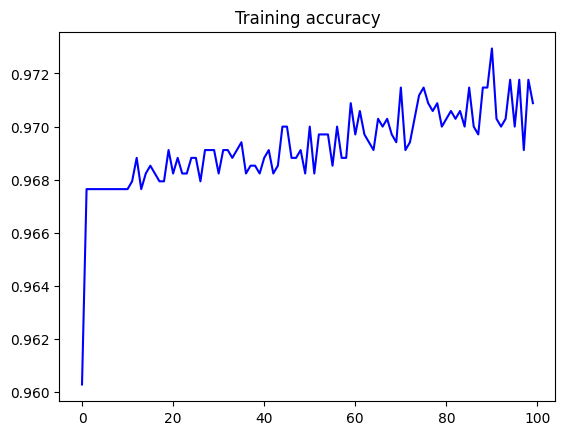

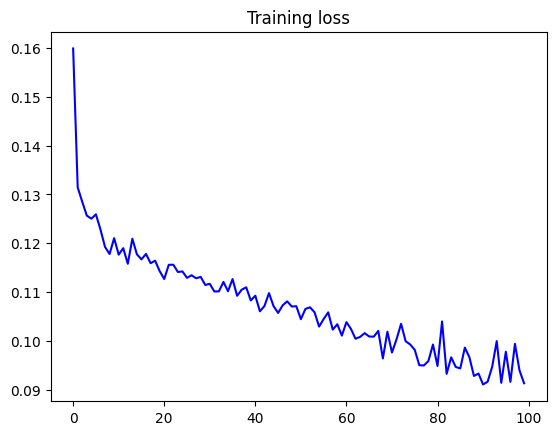

In [61]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.show()